<a href="https://colab.research.google.com/github/ErickOlivetto/bootcamp-data-science-aplicada/blob/main/Modulo1_Saude/Bootcamp_Dados_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.float_format = '{:.2f}'.format

In [2]:
dados = pd.read_csv("https://github.com/ErickOlivetto/bootcamp-data-science-aplicada/raw/main/Dados/A120703189_28_143_208.csv", encoding='ISO-8859-1', skiprows=3, sep = ';', skipfooter=12, thousands='.', decimal=',', engine='python')

In [3]:
usaveis = dados.mean().index.tolist()
usaveis.insert(0, 'Unidade da Federação')
dados_usaveis = dados[usaveis]
dados_usaveis = dados_usaveis.set_index('Unidade da Federação')
dados_usaveis = dados_usaveis.drop('Total', axis=1)

#Aula 3

In [4]:
dados_usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [5]:
dados_usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [6]:
dados_usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

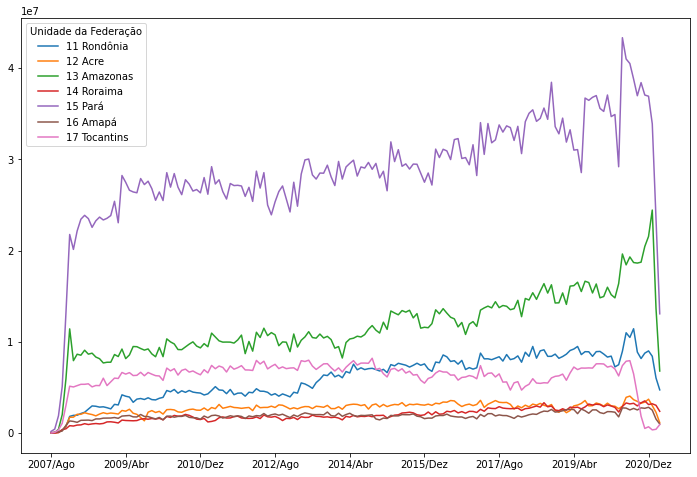

In [7]:
dados_usaveis.head(7).T.plot(figsize=(12,8))

In [8]:
import numpy as np

In [9]:
np.random.seed(687942)

dados_usaveis.sample(7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25983304.03,28690916.87,25936888.97,28550512.79,29318260.49,27519132.91,29788885.15,26294165.36,25250918.87,27615604.26,26601451.82,26689904.87,24003052.09,29290756.45,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10260681.64,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22634327.48,19926336.21,22290820.67,20445273.59,19382682.35,21161380.30,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137456.57,23073542.40,23438983.02,23086206.33,20354752.02,20140235.98,22205064.78,20518138.12,20939897.73,17722069.48,20430287.05,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6

In [10]:
dados_usaveis.sample(7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,52426527.16,55215526.43,50094672.65,58827133.19,61161248.27,60102246.24,61237932.18,63709506.55,63082199.61,59363657.70,64004201.04,61572853.15,53924873.30,59452473.88,57182686.76,61547622.60,62789395.37,65843378.54,61835873.28,68759673.19,64503540.72,66104751.12,67767791.67,62660639.01,58348117.73,64687109.66,59783741.66,56966558.85,51404497.97,58102128.66,63114103.11,79459229.80,75061205.12,67838476.77,70993555.10,79448753.69,72720675.11,57281832.19,47429335.91,19375822.56
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,43024756.36,60885459.85,40668378.23,52753544.47,48916675.76,51177398.60,57241944.15,53485657.68,51244087.82,48489476.33,48689069.43,49708372.48,44413423.34,55993709.91,44833345.11,54473238.33,78128632.98,56028875.32,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,50242531.67,...,67378799.43,72453040.87,65060331.66,74428736.76,74579184.72,79419042.03,75991764.07,77576014.21,78916904.64,72869420.27,79188399.76,74018397.83,70831514.10,79663329.44,74142875.38,75063150.71,76859575.91,82670993.34,78689231.48,88182408.00,83624113.30,81561944.39,82534679.94,74778468.98,75149065.87,80411863.59,73147214.02,74595986.00,69437941.81,89725279.21,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191

In [11]:
dados_usaveis['Total'] = dados_usaveis.sum(axis=1)
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [12]:
ordenados_total = dados_usaveis.sort_values('Total', ascending = False)
ordenados_total = ordenados_total.drop('Total', axis = 1)
ordenados_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

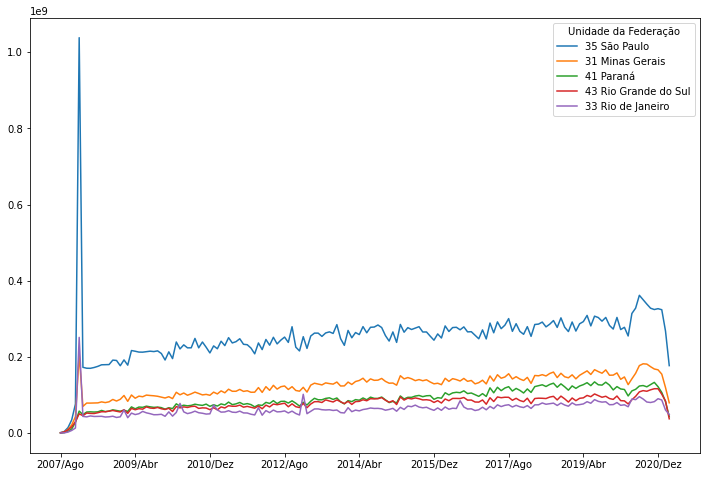

In [13]:
ordenados_total.head().T.plot(figsize=(12,8))

In [14]:
colunas_interesse = ordenados_total.columns[6:]
ordenados_total = ordenados_total[colunas_interesse]

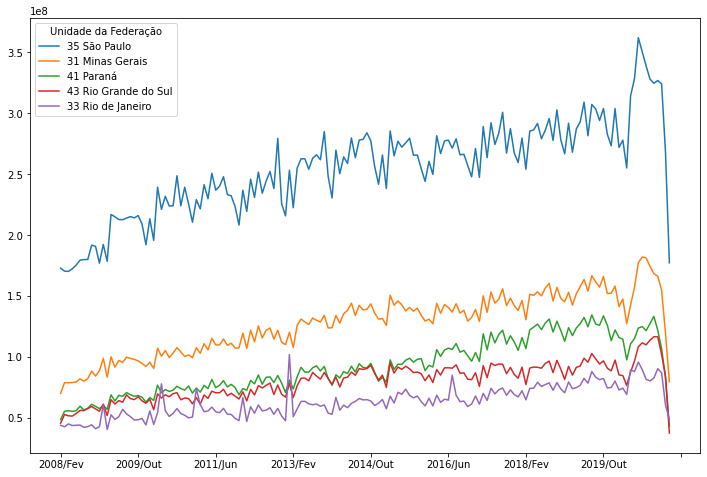

In [15]:
ordenados_total.head().T.plot(figsize=(12,8))

## Desafio: Escolher uma palete de cores mais adequada do matplotlib.

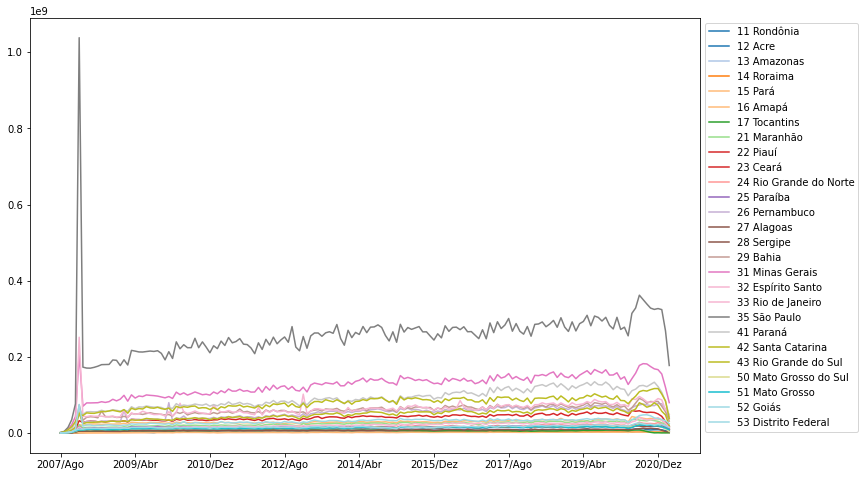

In [16]:
dados_desafio = dados_usaveis.drop('Total', axis=1)
dados_desafio.T.plot(figsize=(12,8), legend = False, colormap = 'tab20')
plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
plt.show()

##Desafio: Adicionar uma coluna mostrando a região (Norte, Nordeste, Sul, Sudeste e Centro-Oeste) de cada estado.

In [17]:
regioes = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul', '5':'Centro-Oeste'}
ordenados_total['Região'] = [regioes[dado[0]] for dado in ordenados_total.index]
ordenados_total.head(10)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,229920625.55,250817406.39,...,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,Sudeste
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,106094329.28,115487199.35,...,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,Sudeste
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,Sul
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77

## Desafio: Formatar o gráfico de custos por mês dos 5 estados, deixando-o agradável. (Bonitão, segundo o Gui)

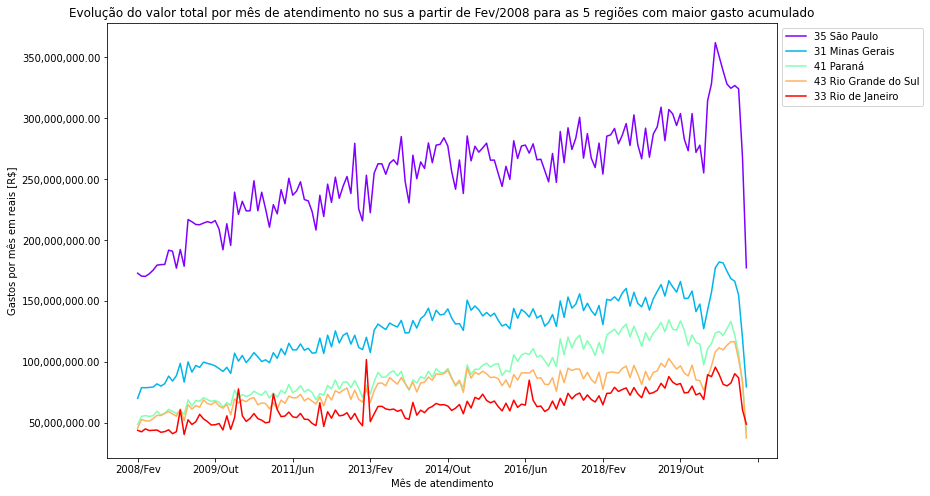

In [18]:
dados_desafio = ordenados_total.drop('Região', axis = 1)
ax = dados_desafio.head().T.plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008 para as 5 regiões com maior gasto acumulado')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
plt.show()

## Desafio: Adicione o seu estado aos 5 estados plotados anteriormente. (São Paulo já está plotado, Adicionar Ceará)

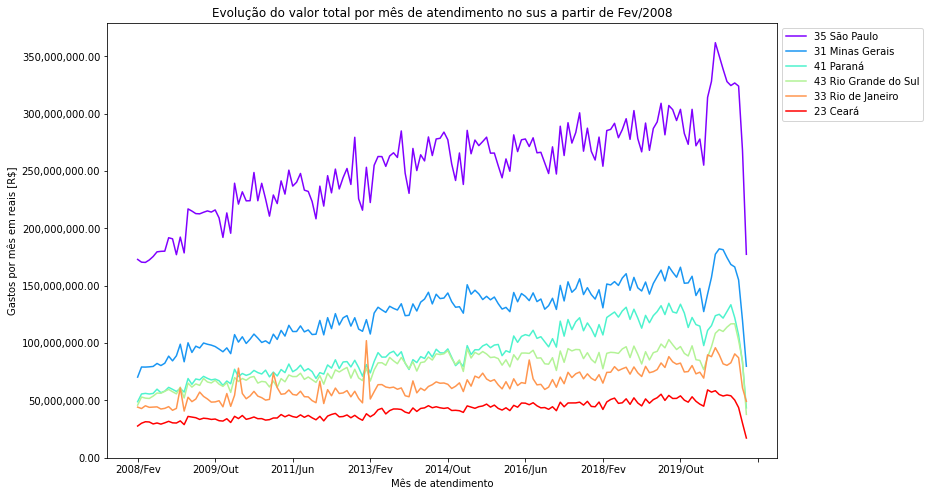

In [19]:
estados_desafio = dados_desafio.head().index.tolist()
estados_desafio.append('23 Ceará')
ax = dados_desafio.T[estados_desafio].plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
plt.show()

## Desafio: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos de casos de dengue.

Observando um gráfico de casos de dengue no Brasil,temos 2015 como sendo um record de casos até 2019, seguido por 2016, 2019 e 2013, todos os anos aprensentando mais de 1,4 milhões de casos, enquanto outros anos apresentam valores inferiores a 1 milhão. Alguns anos intermediários aos destacados anteriormente , apresentam valores bem abaixo dos demais, com desstaque aos anos de 2017 e 2018 com menores valores desde 2006. Levando em conta as regiões, por números absolutos temos um destaque para o sudeste, porém, quando analisando o número de casos por 100.000 habitantes, temos que a região centro-oeste apresenta os valores mais altos, tendo alguns picos em 2010 e 2013, seguido pela região sudeste, na maior parte do tempo.

fonte: https://www.efdeportes.com/efd204/caracteristicas-epidemiologicas-da-dengue.htm

fonte: https://g1.globo.com/bemestar/dengue/noticia/2019/11/02/minas-gerais-goias-e-sao-paulo-representam-70percent-dos-casos-de-dengue-no-brasil-em-2019.ghtml

## Desafio: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região.

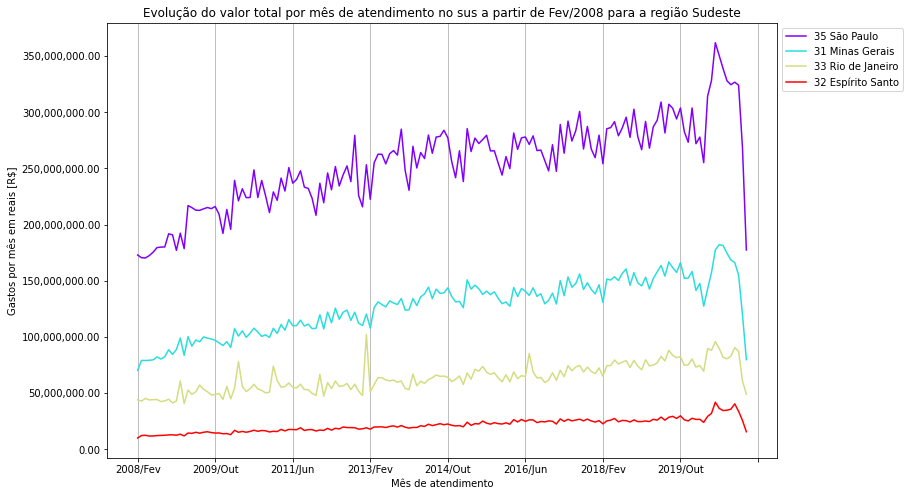

In [20]:
dados_desafio = ordenados_total
dados_desafio = dados_desafio.query('Região == "Sudeste"')
dados_desafio = dados_desafio.drop('Região', axis = 1)
ax = dados_desafio.T.plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008 para a região Sudeste')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
ax.grid(color='Grey', linestyle='-', linewidth=0.5, axis = 'x')
plt.show()

O pico referente, localizado na verdade em Janeiro de 2013, pode ser visto nos estados Rio de Janeiro, São Paulo e Minas Gerais, em ordem de intensidade, entretanto não é obsevado no estado do Espírito Santo, não sendo algo geral do estádo Sudeste.

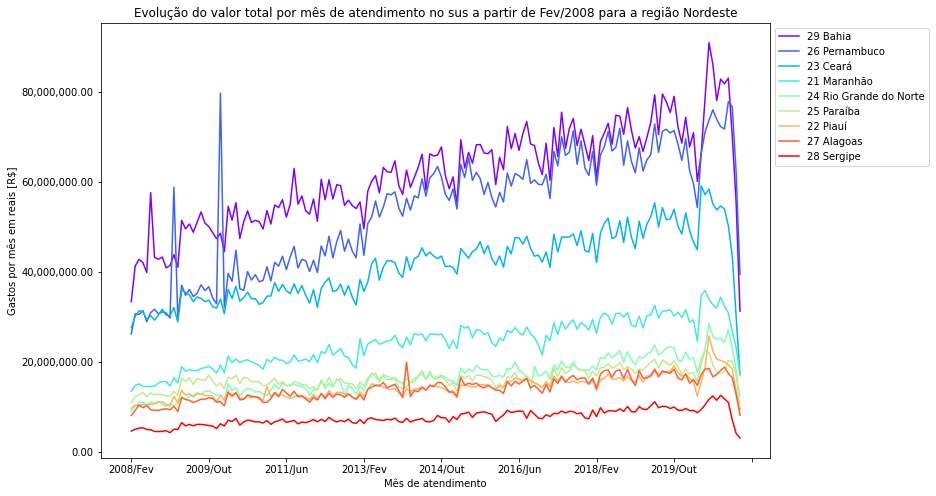

In [21]:
dados_desafio = ordenados_total
dados_desafio = dados_desafio.query('Região == "Nordeste"')
dados_desafio = dados_desafio.drop('Região', axis = 1)
ax = dados_desafio.T.plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008 para a região Nordeste')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
plt.show()

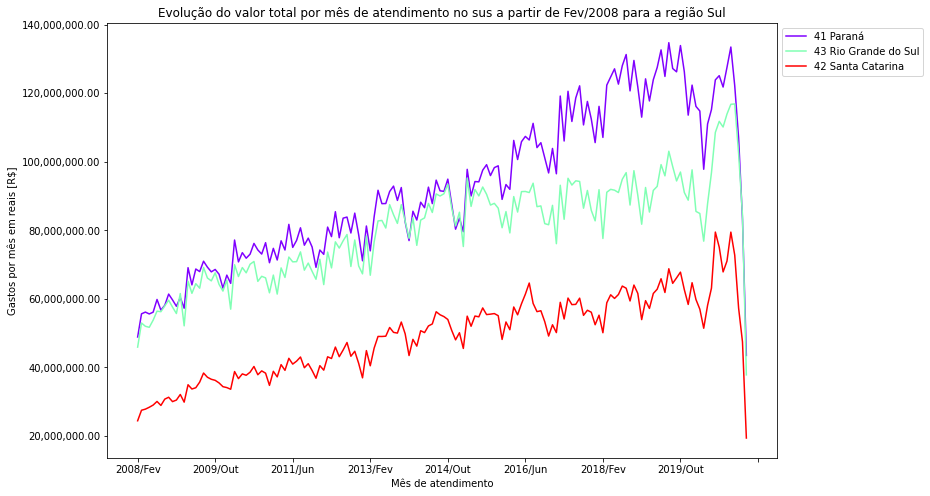

In [22]:
dados_desafio = ordenados_total
dados_desafio = dados_desafio.query('Região == "Sul"')
dados_desafio = dados_desafio.drop('Região', axis = 1)
ax = dados_desafio.T.plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008 para a região Sul')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
plt.show()

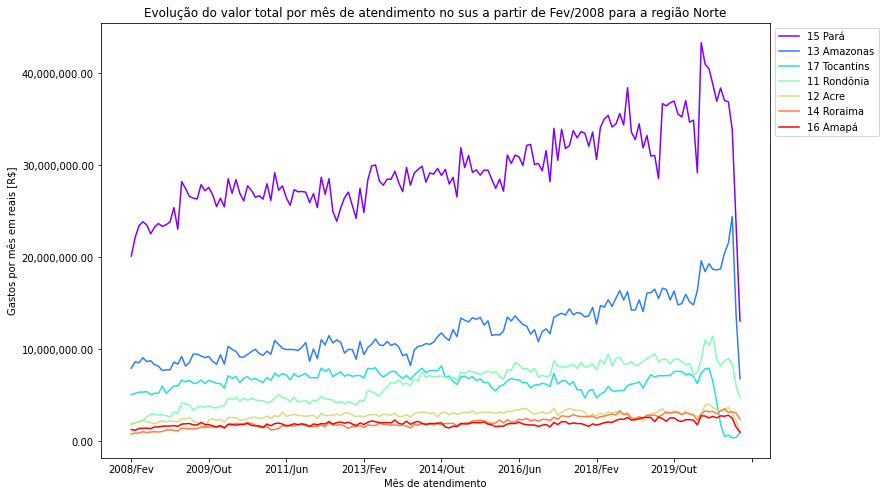

In [23]:
dados_desafio = ordenados_total
dados_desafio = dados_desafio.query('Região == "Norte"')
dados_desafio = dados_desafio.drop('Região', axis = 1)
ax = dados_desafio.T.plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008 para a região Norte')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
plt.show()

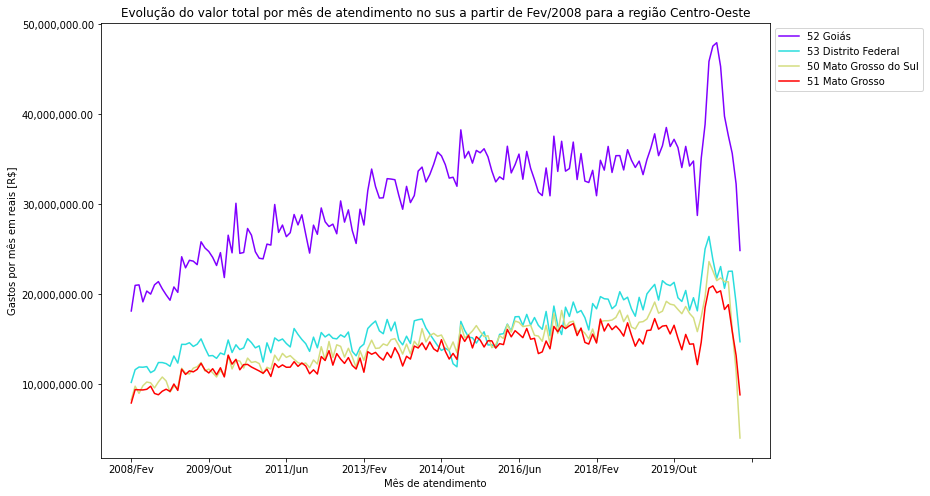

In [24]:
dados_desafio = ordenados_total
dados_desafio = dados_desafio.query('Região == "Centro-Oeste"')
dados_desafio = dados_desafio.drop('Região', axis = 1)
ax = dados_desafio.T.plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008 para a região Centro-Oeste')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
plt.show()

## Desafio: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

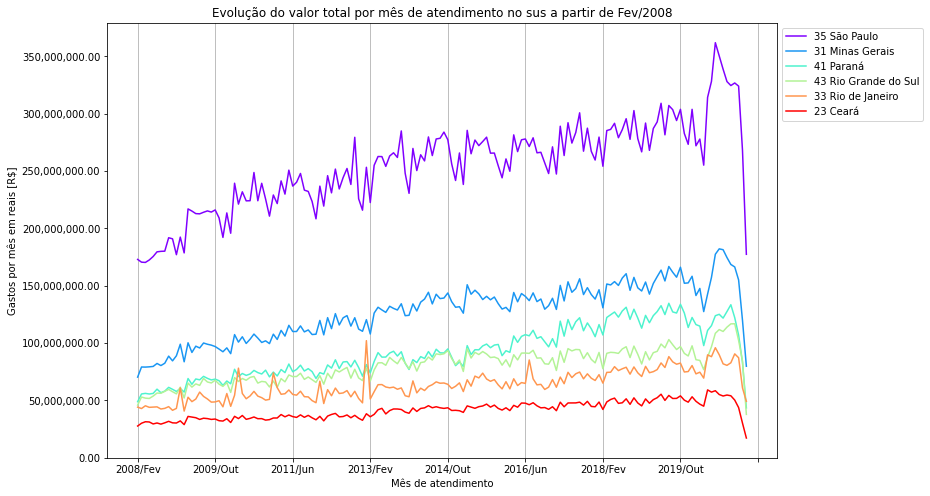

In [25]:
dados_desafio = ordenados_total.drop('Região', axis = 1)
estados_desafio = dados_desafio.head().index.tolist()
estados_desafio.append('23 Ceará')
ax = dados_desafio.T[estados_desafio].plot(figsize=(12,8), legend = False, colormap = 'rainbow')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
ax.set_title('Evolução do valor total por mês de atendimento no sus a partir de Fev/2008')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Gastos por mês em reais [R$]')
ax.grid(color='Grey', linestyle='-', linewidth=0.5, axis = 'x')
plt.show()

Fazendo algumas análises a partir das informações que podem ser retiradas através do gráfico acima, podemos observar, de forma geral, uma elevação dos valores médios com o passar dos anos, sendo possível visualizar uma reta crescente dos valores mensais. É possível também avaliar, principalmente através dos estados com valores mais elevados, uma certa sazonalidade dos valores, apresentando quedas mais intensas que as demais de tempos em tempos, esse comportamento pode ser observado na maioria dos estados, porém é muito mais visível no estado de São Paulo. É possível também observar alguns picos específicos, sendo necessário uma avaliação de casos específicos por serem pontuais. Outra análise possível, podendo ser vista no caso do Ceará, de picos menos constantes e menos intensos. Por fim, um efeito que pode ser notado claramente, é o efeito da Covid-19, com uma significativa elevação em meados de 2020.